In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [118]:
df=pd.read_csv("C:\\Users\\anura\\Desktop\\SYMBIOSIS\\SEM 4\\Mini-Proj(SML)\\uber.csv")

In [119]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [120]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [121]:
#replacing null values
for col in df.columns:
    if df[col].dtypes=='float64':
       df[col] = df[col].fillna(0)

In [122]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)
display(df.head())

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [123]:
nvc=pd.DataFrame(df.isnull().sum().sort_values(),columns=['Total Null Values'])
nvc['Percentage']=round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
df.dropna(inplace=True)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
dropoff_longitude                  0         0.0
dropoff_latitude                   0         0.0
passenger_count                    0         0.0


In [124]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [125]:
df.nunique().sort_values()

passenger_count           8
fare_amount            1244
pickup_longitude      71066
dropoff_longitude     76894
pickup_latitude       83835
dropoff_latitude      90585
pickup_datetime      196629
dtype: int64

In [126]:
display(df.describe())
# df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.524929,39.923691,1.684535
std,9.901776,11.437787,7.720539,13.118377,6.795398,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


array([[<AxesSubplot:xlabel='fare_amount', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='pickup_longitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='pickup_latitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='dropoff_longitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='dropoff_latitude', ylabel='fare_amount'>,
        <AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>],
       [<AxesSubplot:xlabel='fare_amount', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='pickup_latitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='dropoff_longitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='dropoff_latitude', ylabel='pickup_longitude'>,
        <AxesSubplot:xlabel='passenger_count', ylabel='pickup_longitude'>],
       [<AxesSubplot:xlabel='fare_amount', ylabel='pickup_latitude'>,
        <AxesSubplot:xlabel='pickup_longitude', ylabel='pi

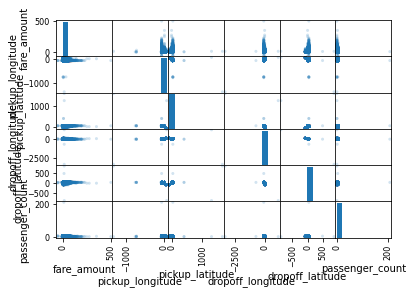

In [127]:
pd.plotting.scatter_matrix(df,alpha=0.2)

In [128]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010457,-0.008481,9.020775e-03,-0.011050,1.014993e-02
pickup_longitude,0.010457,1.000000,-0.816461,8.329590e-01,-0.846247,-4.143855e-04
pickup_latitude,-0.008481,-0.816461,1.000000,-7.747251e-01,0.702303,-1.559842e-03
dropoff_longitude,0.009021,0.832959,-0.774725,1.000000e+00,-0.917024,-6.946897e-07
dropoff_latitude,-0.011050,-0.846247,0.702303,-9.170237e-01,1.000000,-6.235190e-04
passenger_count,0.010150,-0.000414,-0.001560,-6.946897e-07,-0.000624,1.000000e+00


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  200000 non-null  float64
 5   dropoff_latitude   200000 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


<AxesSubplot:>

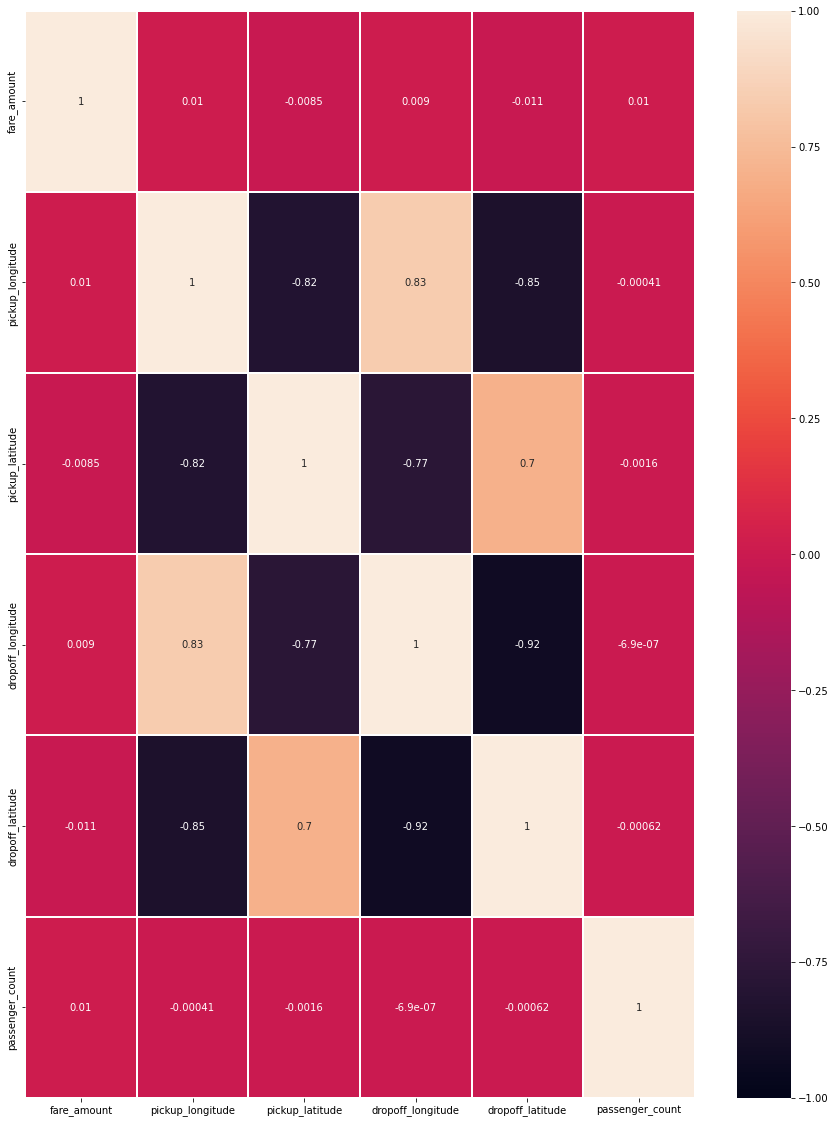

In [130]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,vmin=-1,vmax=1,fmt='.2g')

In [131]:
from math import *

In [132]:
# Define formula to calculate haversine distance
def distance(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [133]:
# Calculate Haversine distance for each row and add distance in km as a new column
df['distance_travelled'] = distance(df['pickup_longitude'].to_numpy(),
         df['pickup_latitude'].to_numpy(),
         df['dropoff_longitude'].to_numpy(),
         df['dropoff_latitude'].to_numpy()
)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   fare_amount         200000 non-null  float64
 1   pickup_datetime     200000 non-null  object 
 2   pickup_longitude    200000 non-null  float64
 3   pickup_latitude     200000 non-null  float64
 4   dropoff_longitude   200000 non-null  float64
 5   dropoff_latitude    200000 non-null  float64
 6   passenger_count     200000 non-null  int64  
 7   distance_travelled  200000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.2+ MB


In [135]:
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         200000 non-null  float64            
 1   pickup_datetime     200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude    200000 non-null  float64            
 3   pickup_latitude     200000 non-null  float64            
 4   dropoff_longitude   200000 non-null  float64            
 5   dropoff_latitude    200000 non-null  float64            
 6   passenger_count     200000 non-null  int64              
 7   distance_travelled  200000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 12.2 MB


In [137]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [138]:
df['day_name'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()
df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.time
df['pickup_hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fare_amount         200000 non-null  float64            
 1   pickup_datetime     200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude    200000 non-null  float64            
 3   pickup_latitude     200000 non-null  float64            
 4   dropoff_longitude   200000 non-null  float64            
 5   dropoff_latitude    200000 non-null  float64            
 6   passenger_count     200000 non-null  int64              
 7   distance_travelled  200000 non-null  float64            
 8   hour                200000 non-null  int64              
 9   day                 200000 non-null  int64              
 10  month               200000 non-null  int64              
 11  year                200000 non-null  int64              
 12  dayofweek       

In [140]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,hour,day,month,year,dayofweek,day_name,pickup_time,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3,Thursday,19:52:06,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4,Friday,20:04:56,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0,Monday,21:45:00,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4,Friday,08:22:21,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,2014,3,Thursday,17:47:00,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,0.112210,10,28,10,2012,6,Sunday,10:49:00,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1.875050,1,14,3,2014,4,Friday,01:09:00,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,12.850319,0,29,6,2009,0,Monday,00:42:00,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,3.539715,14,20,5,2015,2,Wednesday,14:56:25,14


We can observe there are a number of outliers, hence lets plot them

## Outlier treatment

###### we will extract time feature from the 'pickup_datetime' 
###### we will add a variable which measures the distance between pickup and drop

In [141]:
# # The following treatment is being done to outliers:

# passenger_count should be less than 5
# rows with passenger_count = 0 should be dropped
# fare_amount should be kept to the minimum set by cab, i.e., $2.5
# distance should be maximum 130 km
# distance travelled cannot be zero. Rows with distance = 0 must be dropped

In [142]:
df.drop(df[df['passenger_count'] > 5].index, axis=0, inplace=True)
df.drop(df[df['passenger_count'] == 0].index, axis=0, inplace=True)
df.drop(df[df['fare_amount'] < 2.5].index, axis=0, inplace=True)
df.drop(df[df['distance_travelled'] > 130].index, axis=0, inplace=True)
df.drop(df[df['distance_travelled'] == 0].index, axis=0, inplace=True)
df.dropna(axis=0, inplace=True)


In [143]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,hour,day,month,year,dayofweek,day_name,pickup_time,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3,Thursday,19:52:06,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4,Friday,20:04:56,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0,Monday,21:45:00,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4,Friday,08:22:21,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,2014,3,Thursday,17:47:00,17


In [144]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled,hour,day,month,year,dayofweek,pickup_hour
count,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000,189061.000000
mean,11.336739,-73.916225,40.696089,-73.915258,40.694481,1.595115,3.377859,13.489234,15.704989,6.282337,2011.719302,3.049095,13.489234
std,9.730745,2.560946,2.634751,2.561027,2.501323,1.150926,3.984585,6.518660,8.690064,3.439349,1.862527,1.946679,6.518660
min,2.500000,-75.419276,-74.015515,-75.423067,-74.015750,1.000000,0.000084,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992274,40.736440,-73.991594,40.735345,1.000000,1.279954,9.000000,8.000000,3.000000,2010.000000,1.000000,9.000000
50%,8.500000,-73.982133,40.753273,-73.980564,40.753738,1.000000,2.181325,14.000000,16.000000,6.000000,2012.000000,3.000000,14.000000
75%,12.500000,-73.968465,40.767532,-73.965513,40.768327,2.000000,3.938054,19.000000,23.000000,9.000000,2013.000000,5.000000,19.000000
max,499.000000,40.808425,401.066667,40.831932,45.031598,5.000000,129.610094,23.000000,31.000000,12.000000,2015.000000,6.000000,23.000000


In [145]:
# Dropping the columns 'pickup datetime' and 'pickup hour' as we have extracted relvant pieces of information
# from these columns and do not need these columns for our analysis now. Also, 'date' and 'day_name', month and yuear
# as well as pickup and dropoff coordinates are not required as we have the required data extracted from them

data = df.drop(['pickup_datetime','pickup_time', 'day', 'pickup_longitude', 'pickup_latitude',
                  'dropoff_longitude', 'dropoff_latitude', 'day_name'],axis=1)

In [146]:
df = df.drop('pickup_time', axis=1)

In [147]:
# train_df = x_train.drop('pickup_time', axis=1)

# # Select features for training
# features = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare']

# # Update the training and testing data with the selected features
# train_X = x_train[features]
# test_X = x_test[features]

## Numerical features-univariate analysis

In [148]:
# Boxplot and histogram

<AxesSubplot:xlabel='distance_travelled'>

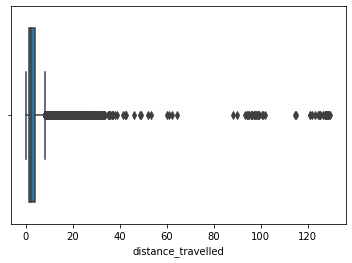

In [149]:
sns.boxplot(x=data['distance_travelled'])

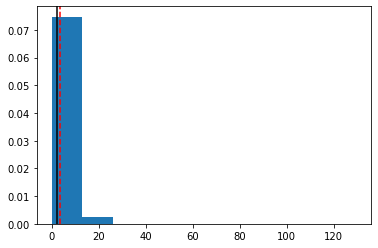

In [150]:
import matplotlib.pyplot as plt
hist = plt.hist(x=df['distance_travelled'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['distance_travelled'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['distance_travelled'].median(), color = 'black', linestyle='-')

In [151]:
# Observations:

# Negatively Skewed
# Outliers on the left end
# Mean and Median are close

## Categorical Features

In [152]:
# Passenger count

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

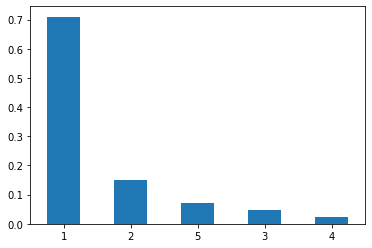

In [153]:
data['passenger_count'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

In [154]:
# Observation:

# Almost 70% of trips had only 1 passenger

In [155]:
# Day of the week

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '4'),
  Text(1, 0, '5'),
  Text(2, 0, '3'),
  Text(3, 0, '2'),
  Text(4, 0, '1'),
  Text(5, 0, '6'),
  Text(6, 0, '0')])

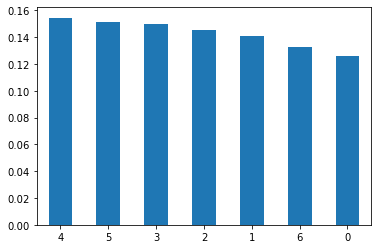

In [156]:
data['dayofweek'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

In [157]:
# Observation:

# As expected, Friday (weekend eve) and Saturday had the highest number of trips

In [158]:
# pick up time

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '19'),
  Text(1, 0, '18'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '13'),
  Text(6, 0, '12'),
  Text(7, 0, '23'),
  Text(8, 0, '14'),
  Text(9, 0, '17'),
  Text(10, 0, '15'),
  Text(11, 0, '11'),
  Text(12, 0, '9'),
  Text(13, 0, '8'),
  Text(14, 0, '10'),
  Text(15, 0, '16'),
  Text(16, 0, '0'),
  Text(17, 0, '7'),
  Text(18, 0, '1'),
  Text(19, 0, '2'),
  Text(20, 0, '6'),
  Text(21, 0, '3'),
  Text(22, 0, '4'),
  Text(23, 0, '5')])

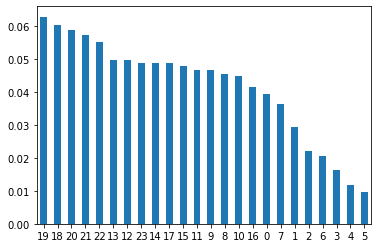

In [159]:
data['pickup_hour'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

In [160]:
# here we can observe that he cab bookings are peak 
# around 7-9PM and are at the lowest from 4-5AM

In [161]:
import geopandas as gpd

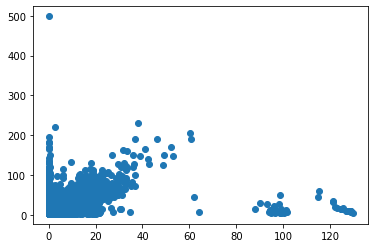

In [162]:
#Scatter plot of distance vs fare amount
plt.scatter(x = data.distance_travelled, y = data.fare_amount)

# Show the plot
plt.show()

In [163]:
# here we can infer that as travel distance increases, the fare amount increases with some discrepencies

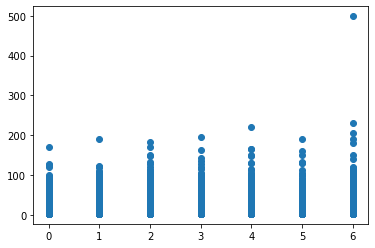

In [164]:
#Scatter plot of day of the week vs fare amount
plt.scatter(x = data.dayofweek, y = data.fare_amount)

# Show the plot
plt.show()

In [165]:
# Generally speaking, weekend fares are higher than weekday fares. This could be due to distance travelled or due to peak hours

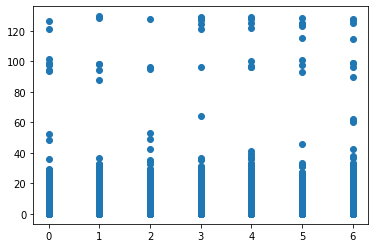

In [166]:
#Scatter plot of day of the week vs distance to see if there is any relationship between them
plt.scatter(x = data.dayofweek, y = data.distance_travelled)

# Show the plot
plt.show()

In [167]:
# We see that there isn;t much of a relationship between distance travelled vs fay of the week - thus, it is appears that fare amount being higher on weekends has a high likelihood of being linked to peak hours / wait time due to higher traffic.

# Unfortunately, we do not have the dropoff time for each ride to be able to ascertain the time of each trip and demonstrate if we can see a relationship between fare and time travelled

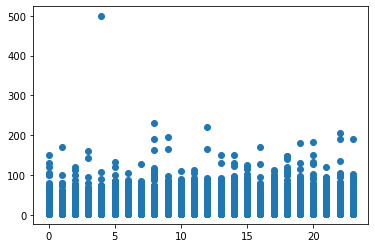

In [168]:
#Scatter plot of pickup time vs fare amount
plt.scatter(x = data.pickup_hour, y = data.fare_amount)

# Show the plot
plt.show()

In [169]:
# We do see some pickup times having a greater % of higher fares as compared to others - however, it is difficult to draw a concluding relationship

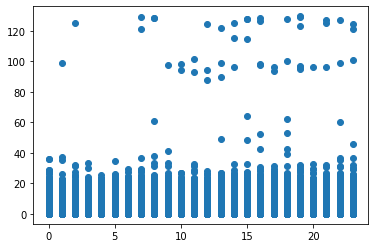

In [170]:
#Scatter plot of pickup time vs distance
plt.scatter(x = data.pickup_hour, y = data.distance_travelled)

# Show the plot
plt.show()

In [171]:
# Some pickup hours have a greater concentration of trips where a high distance was travelled as compared to others

In [172]:
# Drop 'pickup_time' feature from training data
train_df = np.delete(x_train, 2, axis=1)

# Drop 'pickup_time' feature from test data
test_df = np.delete(x_test, 2, axis=1)

### Data Preperation

##### Feature Scaling
Feature Scaling is required because of two reasons:

###### The data points are far from each other. This means that in some columns, the distance between data points is a lot
###### Some of the features have a unit while other features are unitless. Thereofre, it is important to make all features unitless

In [173]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler
std=StandardScaler()



In [174]:
x = data.drop(['fare_amount'], axis = 1)
y = data['fare_amount'].values.reshape(-1, 1)

In [175]:
y_std = std.fit_transform(y)

x_std = std.fit_transform(x)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.3, random_state = 42)

In [177]:
x_train.shape

(132342, 7)

In [178]:
y_train.shape

(132342, 1)

In [179]:
y_test.shape

(56719, 1)

In [180]:
x_test.shape

(56719, 7)

In [181]:
# train_df = train_x.drop('pickup_time', axis=1)

## Regression Models

##### Linear regression

In [182]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [183]:
LR_pred = LR.predict(x_test)

In [184]:
print("Training set score: {:.2f}".format(LR.score(x_train, y_train)))
print("Test set score: {:.7f}".format(LR.score(x_test, y_test)))

Training set score: 0.65
Test set score: 0.5782372


In [185]:
from sklearn import metrics
from sklearn.metrics import r2_score

MAE_LR= metrics.mean_absolute_error(y_test, LR_pred)
MSE_LR= metrics.mean_squared_error(y_test, LR_pred)
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
r2_LR=r2_score(y_test, LR_pred)
Adj_r2_LR=1-(1-r2_score(y_test, LR_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [186]:
print('Mean absolute error of linear regression',MAE_LR)
print('Mean square  error of linear regression',MSE_LR)
print('root Mean square error of linear regression',RMSE_LR)
print('r2 score of linear regression',r2_LR)
print('adjusted r2 of linear regression',Adj_r2_LR)

Mean absolute error of linear regression 0.25739044738591804
Mean square  error of linear regression 0.4147342387915012
root Mean square error of linear regression 0.6439986326006455
r2 score of linear regression 0.5782372370795466
adjusted r2 of linear regression 0.5781851777023457


####  Decision Tree Regressor

In [187]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [188]:
data.dtypes

fare_amount           float64
passenger_count         int64
distance_travelled    float64
hour                    int64
month                   int64
year                    int64
dayofweek               int64
pickup_hour             int64
dtype: object

In [189]:
DTpreds=DT.predict(x_test)

In [190]:
print("Training set score: {:.2f}".format(DT.score(x_train, y_train)))
print("Test set score: {:.7f}".format(DT.score(x_test, y_test)))

Training set score: 1.00
Test set score: 0.5444152


In [191]:
MAE_DT= metrics.mean_absolute_error(y_test, DTpreds)
MSE_DT= metrics.mean_squared_error(y_test, DTpreds)
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test, DTpreds))
r2_DT=r2_score(y_test, DTpreds)
Adj_r2_DT=1-(1-r2_score(y_test, DTpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [192]:
print('Mean absolute error of decision tree',MAE_DT)
print('Mean square  error of decision tree',MSE_DT)
print('root Mean square error of decision tree',RMSE_DT)
print('r2 score of decision tree',r2_DT)
print('adjusted r2 of decision tree',Adj_r2_DT)

Mean absolute error of decision tree 0.3063634463705478
Mean square  error of decision tree 0.44799267311270624
root Mean square error of decision tree 0.6693225478890624
r2 score of decision tree 0.5444151702287512
adjusted r2 of decision tree 0.5443589360976585


#### Random Forest agressor

In [193]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(x_train, y_train)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\3802589840.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


RandomForestRegressor()

In [194]:
RFpreds = RF.predict(x_test)

In [195]:
print("Training set score: {:.2f}".format(RF.score(x_train, y_train)))
print("Test set score: {:.7f}".format(RF.score(x_test, y_test)))

Training set score: 0.97
Test set score: 0.7869623


In [196]:
MAE_RF= metrics.mean_absolute_error(y_test, RFpreds)
MSE_RF= metrics.mean_squared_error(y_test, RFpreds)
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test, RFpreds))
r2_RF=r2_score(y_test, RFpreds)
Adj_r2_RF=1-(1-r2_score(y_test, RFpreds))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [197]:
print('Mean absolute error of Random Forest',MAE_RF)
print('Mean square  error of Random Forest',MSE_RF)
print('root Mean square error of Random Forest',RMSE_RF)
print('r2 score of Random Forest',r2_RF)
print('adjusted r2 of Random Forest',Adj_r2_RF)

Mean absolute error of Random Forest 0.22542894546659015
Mean square  error of Random Forest 0.2094875160538825
root Mean square error of Random Forest 0.45769806210413705
r2 score of Random Forest 0.7869622874019657
adjusted r2 of Random Forest 0.7869359915512809


#### Boosting

In [198]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

#### Gradient Boosting 

In [199]:
gbr=GradientBoostingRegressor(random_state=43)
gbr.fit(x_train,y_train)
predictions_gbr=gbr.predict(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
print("Training set score: {:.2f}".format(gbr.score(x_train, y_train)))
print("Test set score: {:.7f}".format(gbr.score(x_test, y_test)))

Training set score: 0.82
Test set score: 0.7831503


In [201]:
MAE_GBR= metrics.mean_absolute_error(y_test, predictions_gbr)
MSE_GBR= metrics.mean_squared_error(y_test, predictions_gbr)
RMSE_GBR= np.sqrt(metrics.mean_squared_error(y_test, predictions_gbr))
r2_GBR=r2_score(y_test, predictions_gbr)
Adj_r2_GBR=1-(1-r2_score(y_test, predictions_gbr))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [202]:
print('Mean absolute error of gradient boosting regressor',MAE_GBR)
print('Mean square  error of gradient boosting regressor',MSE_GBR)
print('root Mean square error of gradient boosting regressor',RMSE_GBR)
print('r2 score of gradient boosting regressor',r2_GBR)
print('adjusted r2 of gradient boosting regressor',Adj_r2_GBR)

Mean absolute error of gradient boosting regressor 0.21190385815298493
Mean square  error of gradient boosting regressor 0.21323597094964145
root Mean square error of gradient boosting regressor 0.46177480545136007
r2 score of gradient boosting regressor 0.7831503072333528
adjusted r2 of gradient boosting regressor 0.7831235408591156


#### XGBoost Classifier

In [203]:
from xgboost import XGBRegressor

In [204]:
xgb = XGBRegressor(random_state = 42, scale_pos_weight = 1)
xgb.fit(x_train, y_train)
predictions_xgb = xgb.predict(x_test)

In [205]:
print("Training set score: {:.2f}".format(xgb.score(x_train, y_train)))
print("Test set score: {:.7f}".format(xgb.score(x_test, y_test)))

Training set score: 0.88
Test set score: 0.7884254


In [206]:
MAE_XGB= metrics.mean_absolute_error(y_test, predictions_xgb)
MSE_XGB= metrics.mean_squared_error(y_test, predictions_xgb)
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb))
r2_XGB=r2_score(y_test, predictions_xgb)
Adj_r2_XGB=1-(1-r2_score(y_test, predictions_xgb))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [207]:
print('Mean absolute error of XGB regressor',MAE_XGB)
print('Mean square  error of XGB regressor',MSE_XGB)
print('root Mean square error of XGB regressor',RMSE_XGB)
print('r2 score of XGB regressor',r2_XGB)
print('adjusted r2 of XGB regressor',Adj_r2_XGB)

Mean absolute error of XGB regressor 0.2101110160680902
Mean square  error of XGB regressor 0.20804879735112417
root Mean square error of XGB regressor 0.4561236645375069
r2 score of XGB regressor 0.788425388150312
adjusted r2 of XGB regressor 0.7883992728943132


#### ADAboost Classifier

In [208]:
from sklearn.ensemble import AdaBoostRegressor

In [209]:
ada = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
ada.fit(x_train, y_train)
predictions_ada = ada.predict(x_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [210]:
MAE_ada= metrics.mean_absolute_error(y_test, predictions_ada)
MSE_ada= metrics.mean_squared_error(y_test, predictions_ada)
RMSE_ada= np.sqrt(metrics.mean_squared_error(y_test, predictions_ada))
r2_ada=r2_score(y_test, predictions_ada)
Adj_r2_ada=1-(1-r2_score(y_test, predictions_ada))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [211]:
print('Mean absolute error of ADA regressor',MAE_ada)
print('Mean square  error of ADA regressor',MSE_ada)
print('root Mean square error of ADA regressor',RMSE_ada)
print('r2 score of ADA regressor',r2_ada)
print('adjusted r2 of ADA regressor',Adj_r2_ada)

Mean absolute error of ADA regressor 0.31378823439939096
Mean square  error of ADA regressor 0.27616059572525387
root Mean square error of ADA regressor 0.5255098436045265
r2 score of ADA regressor 0.7191592953544489
adjusted r2 of ADA regressor 0.7191246303876432


#### KNN

In [212]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)


In [213]:
MAE_knn= metrics.mean_absolute_error(y_test, KNN_pred)
MSE_knn= metrics.mean_squared_error(y_test, KNN_pred)
RMSE_knn= np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
r2_knn=r2_score(y_test, KNN_pred)
Adj_r2_knn=1-(1-r2_score(y_test, KNN_pred))*((len(x_test)-1)/(len(x_test)-len(x_test[0])-1))

In [214]:
print('Mean absolute error of ADA regressor',MAE_knn)
print('Mean square  error of ADA regressor',MSE_knn)
print('root Mean square error of ADA regressor',RMSE_knn)
print('r2 score of ADA regressor',r2_knn)
print('adjusted r2 of ADA regressor',Adj_r2_knn)

Mean absolute error of ADA regressor 0.2442964813806562
Mean square  error of ADA regressor 0.22637780953240647
root Mean square error of ADA regressor 0.47579177119030386
r2 score of ADA regressor 0.7697857531838183
adjusted r2 of ADA regressor 0.7697573371846698


#### Choosing the best model

In [215]:
cols = ['Model', 'MSE', 'RMSE', 'R2_score','MAE','ADJ_r']
result_table = pd.DataFrame(columns = cols)

In [216]:
full_metrics = pd.Series({'Model': "Linear Regression", 'MSE': MSE_LR, 'RMSE' : RMSE_LR, 'R2_score' : r2_LR,'MAE':MAE_LR,'ADJ_r':Adj_r2_LR})

In [217]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [218]:
full_metrics = pd.Series({'Model': "Decision Tree", 'MSE': MSE_DT, 'RMSE' : RMSE_DT, 'R2_score' : r2_DT,'MAE':MAE_DT,'ADJ_r':Adj_r2_DT})

In [219]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [220]:
full_metrics = pd.Series({'Model': "Random Forest", 'MSE': MSE_RF, 'RMSE' : RMSE_RF, 'R2_score' : r2_RF,'MAE':MAE_RF,'ADJ_r':Adj_r2_RF})

In [221]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [222]:
full_metrics = pd.Series({'Model': "Gradient Boosting", 'MSE': MSE_GBR, 'RMSE' : RMSE_GBR, 'R2_score' : r2_GBR,'MAE':MAE_GBR,'ADJ_r':Adj_r2_GBR})

In [223]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [224]:
full_metrics = pd.Series({'Model': "XGBoost", 'MSE': MSE_XGB, 'RMSE' : RMSE_XGB, 'R2_score' : r2_XGB,'MAE':MAE_XGB,'ADJ_r':Adj_r2_XGB})

In [225]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [226]:
full_metrics = pd.Series({'Model': "ADABoost", 'MSE': MSE_ada, 'RMSE' : RMSE_ada, 'R2_score' : r2_ada,'MAE':MAE_ada,'ADJ_r':Adj_r2_ada})

In [227]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [228]:
full_metrics = pd.Series({'Model': "KNN", 'MSE': MSE_knn, 'RMSE' : RMSE_knn, 'R2_score' : r2_knn,'MAE':MAE_knn,'ADJ_r':Adj_r2_knn})

In [229]:
result_table = result_table.append(full_metrics, ignore_index = True)

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\917985854.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append(full_metrics, ignore_index = True)


In [230]:
result_table

,Model,MSE,RMSE,R2_score,MAE,ADJ_r
0,Linear Regression,0.414734,0.643999,0.578237,0.25739,0.578185
1,Decision Tree,0.447993,0.669323,0.544415,0.306363,0.544359
2,Random Forest,0.209488,0.457698,0.786962,0.225429,0.786936
3,Gradient Boosting,0.213236,0.461775,0.78315,0.211904,0.783124
4,XGBoost,0.208049,0.456124,0.788425,0.210111,0.788399
5,ADABoost,0.276161,0.52551,0.719159,0.313788,0.719125
6,KNN,0.226378,0.475792,0.769786,0.244296,0.769757


Based on the above, Random Forest produces the best results out of all tested models. However, hyperparameter tuning could help improve the results

In [231]:
import pickle

# # train your model and get the best model
best_model = RandomForestRegressor()

# # fit the model on the training data
best_model.fit(x_train, y_train)

#  save the best model using pickle
filename = 'finalized_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

C:\Users\anura\AppData\Local\Temp\ipykernel_15232\3343157721.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_train, y_train)


# Testing Data